In [3]:
import pandas as pd
import numpy as np
import tdstool
from matplotlib import pyplot as plt

In [4]:
BG = tdstool.read_tdscsv(r"TDS数据/BGair.csv")
Sam = tdstool.read_tdscsv(r"TDS数据/tms0(1)_Time.csv")


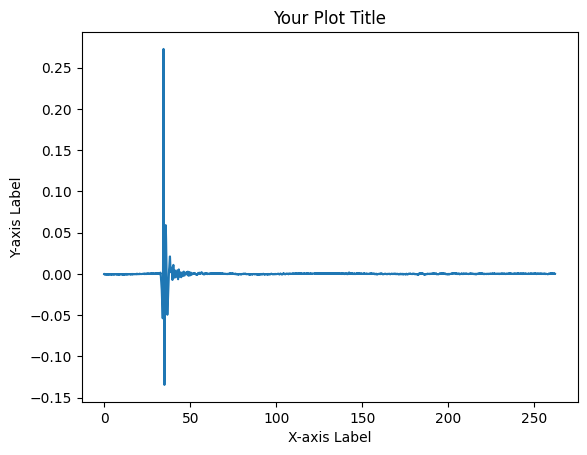

In [5]:
x = Sam.iloc[:, 0]  
y = Sam.iloc[:, 1]  

plt.plot(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Your Plot Title')
plt.show()


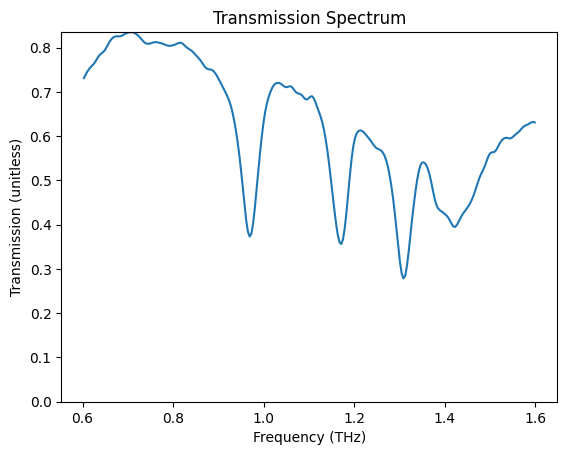

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化变量（示例数据）
dt = 0.002
add0 = 0
# BG和Sam是之前已经加载的数据(背景和样品)
refE = BG.iloc[:, 1]
samE = Sam.iloc[:, 1]
refE_max_index = refE.idxmax()
samE_max_index = samE.idxmax()
BG_value = BG.iloc[refE_max_index, 0]
Sam_value = Sam.iloc[samE_max_index, 0]
Delay = BG_value - Sam_value
# 计算点数和频率分辨率
point = len(BG) + add0
df = 1 / (dt * point)
f = np.arange(0, point) * df

# 时间数组和相位
time = np.arange(0, point) * dt
phase0 = 2 * np.pi * f * Delay

# 窗函数
y1 = np.ones(point)
y2 = np.ones(point)
a = 0.1
addwin = 1
t11,t12 = 0,100
t21,t22 = 0,100

if addwin == 1:
    # 对于y1的汉宁窗
    for j in range(point):
        t = time[j]
        if t11 <= t <= t12:
            # 应用汉宁窗函数
            y1[j] *= 0.5 * (1 - np.cos(2 * np.pi * (t - t11) / (t12 - t11)))
        else:
            y1[j] = 0  # 在窗外的点可以设置为0或其他衰减函数

    # 对于y2的汉宁窗
    for j in range(point):
        t = time[j]
        if t21 <= t <= t22:
            # 应用汉宁窗函数
            y2[j] *= 0.5 * (1 - np.cos(2 * np.pi * (t - t21) / (t22 - t21)))
        else:
            y2[j] = 0  # 在窗外的点可以设置为0或其他衰减函数

# 信号处理
Eref = np.concatenate((refE * y1, np.zeros(add0)))
Esam = np.concatenate((samE * y2, np.zeros(add0)))
Eref1 = np.fft.fft(Eref)
Esam1 = np.fft.fft(Esam)
Pref = np.abs(Eref1)
Psam = np.abs(Esam1)
FFTt = Esam1 / Eref1
T = np.abs(FFTt)**2
TdB = 20 * np.log10(T)
n = 0
phase = -np.unwrap(np.angle(FFTt)) + n * np.pi
gro = np.diff(phase) / np.diff(f)

# 设置想要绘制的频率范围
f_min = 0.6 # 设置你希望的最小频率
f_max = 1.6    # 设置你希望的最大频率
index_min = np.argmax(f >= f_min)  # 找到最小频率的索引
index_max = np.argmax(f > f_max)   # 找到最大频率的索引

# 获取传输数据的最大值
max_T = np.max(T[index_min:index_max])
# 如果最大值大于1，则将所有点向下平移
if max_T > 1:
    shift = max_T - 1
    T_shifted = T[index_min:index_max] - shift
else:
    T_shifted = T[index_min:index_max]

# 绘图
fig, ax = plt.subplots()
ax.plot(f[index_min:index_max], T_shifted)
ax.set_ylim(0, max_T) 
# 根据平移后的数据调整y轴范围
ax.set_title('Transmission Spectrum')
ax.set_xlabel('Frequency (THz)')
ax.set_ylabel('Transmission (unitless)')
plt.show()



In [3]:
import random
from tkinter import *
from tkinter import filedialog
from tkinter.ttk import *
class WinGUI(Tk):
    def __init__(self):
        super().__init__()
        self.__win()
        self.tk_button_lwqjcfcu = self.__tk_button_lwqjcfcu(self)
        self.tk_input_lwrbzcgo = self.__tk_input_lwrbzcgo(self)
        self.tk_list_box_lwrc07lb = self.__tk_list_box_lwrc07lb(self)
        self.tk_input_lwrc3al1 = self.__tk_input_lwrc3al1(self)
        self.tk_button_lwrc3doc = self.__tk_button_lwrc3doc(self)
        self.tk_label_lwrc3w37 = self.__tk_label_lwrc3w37(self)
        self.tk_label_lwrc3xa5 = self.__tk_label_lwrc3xa5(self)
    def __win(self):
        self.title("Tkinter布局助手")
        # 设置窗口大小、居中
        width = 600
        height = 500
        screenwidth = self.winfo_screenwidth()
        screenheight = self.winfo_screenheight()
        geometry = '%dx%d+%d+%d' % (width, height, (screenwidth - width) / 2, (screenheight - height) / 2)
        self.geometry(geometry)
        
        self.minsize(width=width, height=height)
        
    def scrollbar_autohide(self,vbar, hbar, widget):
        """自动隐藏滚动条"""
        def show():
            if vbar: vbar.lift(widget)
            if hbar: hbar.lift(widget)
        def hide():
            if vbar: vbar.lower(widget)
            if hbar: hbar.lower(widget)
        hide()
        widget.bind("<Enter>", lambda e: show())
        if vbar: vbar.bind("<Enter>", lambda e: show())
        if vbar: vbar.bind("<Leave>", lambda e: hide())
        if hbar: hbar.bind("<Enter>", lambda e: show())
        if hbar: hbar.bind("<Leave>", lambda e: hide())
        widget.bind("<Leave>", lambda e: hide())
    
    def v_scrollbar(self,vbar, widget, x, y, w, h, pw, ph):
        widget.configure(yscrollcommand=vbar.set)
        vbar.config(command=widget.yview)
        vbar.place(relx=(w + x) / pw, rely=y / ph, relheight=h / ph, anchor='ne')
    def h_scrollbar(self,hbar, widget, x, y, w, h, pw, ph):
        widget.configure(xscrollcommand=hbar.set)
        hbar.config(command=widget.xview)
        hbar.place(relx=x / pw, rely=(y + h) / ph, relwidth=w / pw, anchor='sw')
    def create_bar(self,master, widget,is_vbar,is_hbar, x, y, w, h, pw, ph):
        vbar, hbar = None, None
        if is_vbar:
            vbar = Scrollbar(master)
            self.v_scrollbar(vbar, widget, x, y, w, h, pw, ph)
        if is_hbar:
            hbar = Scrollbar(master, orient="horizontal")
            self.h_scrollbar(hbar, widget, x, y, w, h, pw, ph)
        self.scrollbar_autohide(vbar, hbar, widget)
    def __tk_button_lwqjcfcu(self, parent):
        btn = Button(parent, text="打开数据文件夹", takefocus=False, command = lambda: self.select_folder(self.tk_label_lwrc3w37))
        btn.place(relx=0.7500, rely=0.0800, relwidth=0.1667, relheight=0.0600)
        return btn

    def select_folder(self, label_to_update):
        folder_path = filedialog.askdirectory()
        if folder_path:
            label_to_update.config(text=folder_path)

    def __tk_input_lwrbzcgo(self,parent):
        ipt = Entry(parent, )
        ipt.place(relx=0.2167, rely=0.0800, relwidth=0.4667, relheight=0.0600)
        return ipt
    def __tk_list_box_lwrc07lb(self,parent):
        lb = Listbox(parent)
        
        lb.insert(END, "列表框")
        
        lb.insert(END, "Python")
        
        lb.insert(END, "Tkinter Helper")
        
        lb.place(relx=0.2233, rely=0.5320, relwidth=0.2500, relheight=0.2000)
        return lb
    def __tk_input_lwrc3al1(self,parent):
        ipt = Entry(parent, )
        ipt.place(relx=0.2167, rely=0.2000, relwidth=0.4667, relheight=0.0600)
        return ipt
    def __tk_button_lwrc3doc(self,parent):
        btn = Button(parent, text="打开背景", takefocus=False,)
        btn.place(relx=0.7500, rely=0.2000, relwidth=0.1667, relheight=0.0600)
        return btn
    def __tk_label_lwrc3w37(self,parent):
        label = Label(parent,text="TDS数据路径",anchor="center", )
        label.place(relx=0.0083, rely=0.0800, relwidth=0.1333, relheight=0.0600)
        return label
    def __tk_label_lwrc3xa5(self,parent):
        label = Label(parent,text="背景路径",anchor="center", )
        label.place(relx=0.0083, rely=0.2000, relwidth=0.1333, relheight=0.0600)
        return label

class Win(WinGUI):
    def __init__(self, controller):
        self.ctl = controller
        super().__init__()
        self.__event_bind()
        self.__style_config()
        self.ctl.init(self)
    def __event_bind(self):
        pass
    def __style_config(self):
        pass
if __name__ == "__main__":
    win = WinGUI()
    win.mainloop()

In [5]:
import tkinter as tk
from tkinter import filedialog
import os

def select_folder():
    folder_path = filedialog.askdirectory()
    if folder_path:
        folder_label.config(text=folder_path)
        list_files(folder_path)

def list_files(folder_path):
    for widget in files_frame.winfo_children():
        widget.destroy()
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        label = tk.Label(files_frame, text=filename)
        label.pack()

app = tk.Tk()
app.title("文件夹读取器")

frame = tk.Frame(app)
frame.pack(pady=20)

select_button = tk.Button(frame, text="选择文件夹", command=select_folder)
select_button.pack(side=tk.LEFT, padx=10)

folder_label = tk.Label(frame, text="未选择文件夹")
folder_label.pack(side=tk.LEFT)

files_frame = tk.Frame(app)
files_frame.pack(pady=20)

app.mainloop()
